# M5 Forecasting Competition- Accuracy 
## Part 1
## Exploratory Data Analysis

In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import gc
import time
import datetime
from joblib import Parallel, delayed
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
sns.set()
%matplotlib inline
from matplotlib.pyplot import figure
from tqdm import tqdm
from itertools import cycle
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])


In [56]:
train = "sales_train_validation.csv"
df_train=pd.read_csv(train, sep=",")

In [57]:
calendar = "calendar.csv"
df_calendar = pd.read_csv(calendar, sep=",")

In [58]:
df_prices = pd.read_csv("sell_prices.csv", sep=",")

### Exploration of a single item : FOODS_3_823

In [59]:
df_train.loc[df_train["item_id"] == "FOODS_3_823"]


,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
3044,FOODS_3_823_CA_1_validation,FOODS_3_823,FOODS_3,FOODS,CA_1,CA,0,0,0,0,...,4,0,2,1,0,2,0,4,1,1
6093,FOODS_3_823_CA_2_validation,FOODS_3_823,FOODS_3,FOODS,CA_2,CA,0,0,0,0,...,4,2,1,3,1,3,0,2,2,3
9142,FOODS_3_823_CA_3_validation,FOODS_3_823,FOODS_3,FOODS,CA_3,CA,10,5,4,5,...,2,2,2,3,3,2,3,4,1,0
12191,FOODS_3_823_CA_4_validation,FOODS_3_823,FOODS_3,FOODS,CA_4,CA,1,1,1,4,...,3,1,2,2,0,1,1,3,3,0
15240,FOODS_3_823_TX_1_validation,FOODS_3_823,FOODS_3,FOODS,TX_1,TX,2,2,2,2,...,0,1,0,0,0,0,0,0,1,0
18289,FOODS_3_823_TX_2_validation,FOODS_3_823,FOODS_3,FOODS,TX_2,TX,2,1,0,1,...,0,0,0,0,1,0,0,0,1,0
21338,FOODS_3_823_TX_3_validation,FOODS_3_823,FOODS_3,FOODS,TX_3,TX,0,0,0,0,...,1,1,0,1,0,0,0,2,0,2
24387,FOODS_3_823_WI_1_validation,FOODS_3_823,FOODS_3,FOODS,WI_1,WI,0,0,0,0,...,0,1,2,1,0,0,0,2,0,0
27436,FOODS_3_823_WI_2_validation,FOODS_3_823,FOODS_3,FOODS,WI_2,WI,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
30485,FOODS_3_823_WI_3_validation,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,0,0,2,2,...,2,0,0,0,0,0,1,0,0,1


**From the table we can see this item is being sold in 10 different stores in 3 states.
Also, is clear the amount of the items are sold each day in each store.**


**Plot: Daily Sales of FOODS_3_823**

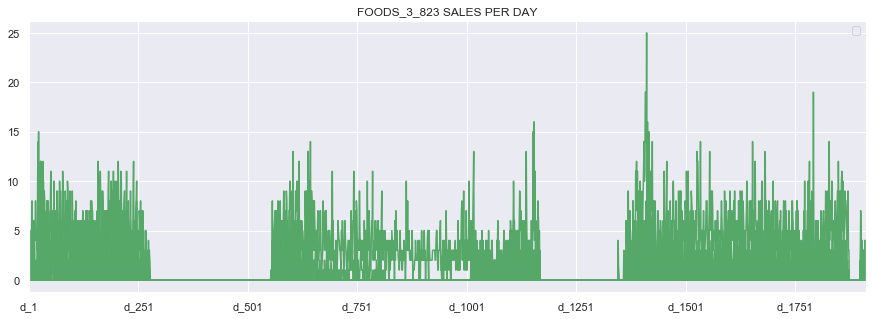

In [61]:
d_cols = [c for c in df_train.columns if "d_" in c]
df_train.loc[df_train["item_id"] == "FOODS_3_823"].set_index('item_id')[d_cols].T.plot(figsize=(15, 5),
          title='FOODS_3_823 SALES PER DAY',
          color="g")
plt.legend("")
plt.show()

**Plot: Daily Sales of FOODS_3_823 in each shop**

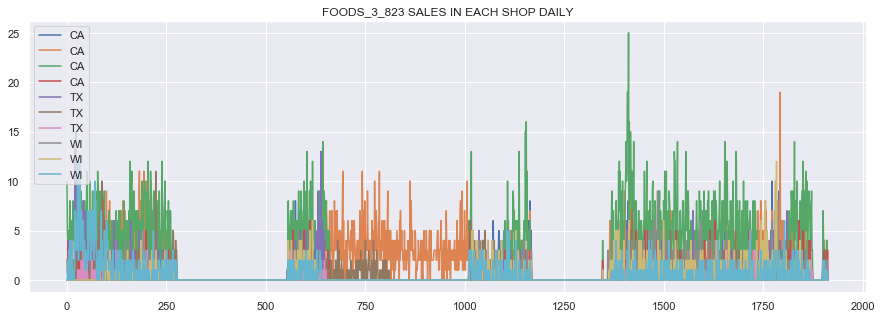

In [62]:
plt.figure(figsize=(15, 5))
for i in range(10):
    plt.plot(df_train.loc[df_train["item_id"] == "FOODS_3_823"].iloc[i, 6:].values,label=df_train.loc[df_train["item_id"] == "FOODS_3_823"].iloc[i, 5]);
    plt.title("FOODS_3_823 SALES IN EACH SHOP DAILY")
    plt.legend(loc=2);

### Exploration of a single item in a specific store : FOODS_3_823_CA_3_validation.


In [63]:
df_train.loc[df_train["id"] == "FOODS_3_823_CA_3_validation"]

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
9142,FOODS_3_823_CA_3_validation,FOODS_3_823,FOODS_3,FOODS,CA_3,CA,10,5,4,5,...,2,2,2,3,3,2,3,4,1,0


**Plot: Daily Sales of FOODS_3_823_CA_3_validation**

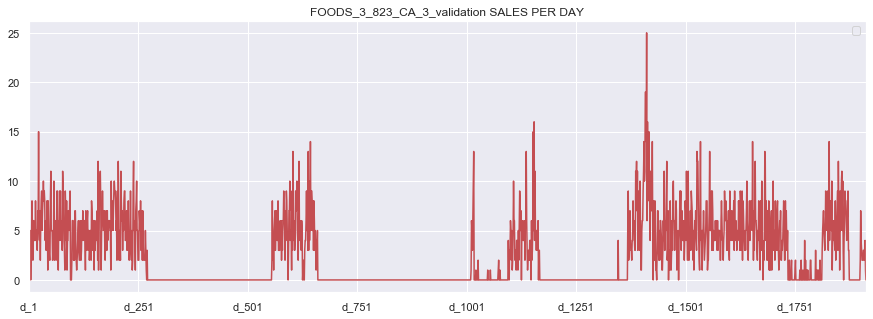

In [64]:
d_cols = [c for c in df_train.columns if "d_" in c]
df_train.loc[df_train["id"] == "FOODS_3_823_CA_3_validation"].set_index('id')[d_cols].T.plot(figsize=(15, 5),
          title='FOODS_3_823_CA_3_validation SALES PER DAY',
          color="r")
plt.legend("")
plt.show()

*Merge dataframes of Calendar and Sales in order to have a more accurate idea about the exact dates of the sales* 

In [65]:
df_col1 = pd.concat([df_train,df_calendar], axis=1)
df_col1[['id','item_id','d','date','event_name_1','event_name_2',
     'event_type_1','event_type_2', 'snap_CA']]

,id,item_id,d,date,event_name_1,event_name_2,event_type_1,event_type_2,snap_CA
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,d_1,2011-01-29,NaN,NaN,NaN,NaN,0.0
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,d_2,2011-01-30,NaN,NaN,NaN,NaN,0.0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,d_3,2011-01-31,NaN,NaN,NaN,NaN,0.0
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,d_4,2011-02-01,NaN,NaN,NaN,NaN,1.0
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,d_5,2011-02-02,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...
30485,FOODS_3_823_WI_3_validation,FOODS_3_823,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30486,FOODS_3_824_WI_3_validation,FOODS_3_824,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30487,FOODS_3_825_WI_3_validation,FOODS_3_825,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30488,FOODS_3_826_WI_3_validation,FOODS_3_826,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Now we shall plot some random products in a specific store CA_3 with the exact calendar dates** 

**Plot: Daily Sales of FOODS_3_823_CA_3**

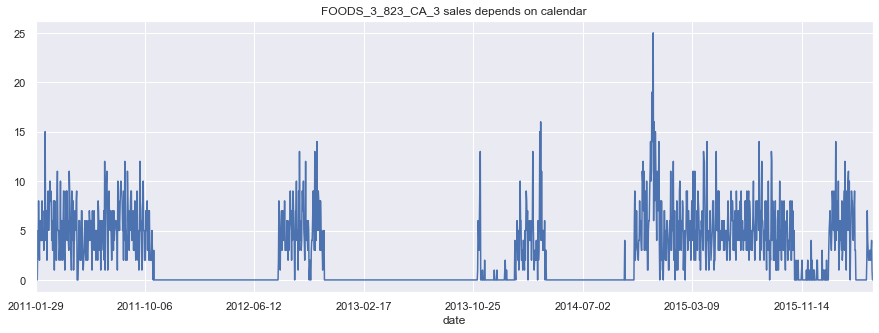

In [66]:
food = df_train.loc[df_train["id"] == "FOODS_3_823_CA_3_validation"][d_cols].T
food = food.rename(columns={9142: "FOODS_3_823_CA_3"})
food = food.reset_index().rename(columns={"index": "d"})
food = food.merge(df_calendar,how="left", validate="1:1")
food.set_index("date")["FOODS_3_823_CA_3"].plot(figsize=(15, 5),
                                                   color="b",
                                                    title="FOODS_3_823_CA_3 sales depends on calendar")

                        

**Plot: Daily Sales of HOBBIES_1_004_CA_3**

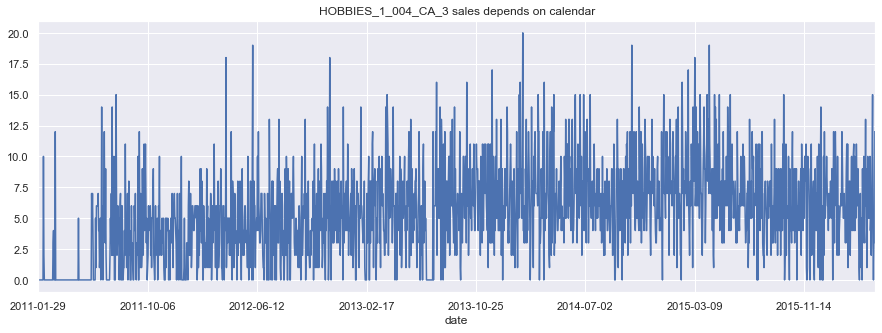

In [67]:
hobbies = df_train.loc[df_train["id"] == "HOBBIES_1_004_CA_3_validation"][d_cols].T
hobbies = hobbies.rename(columns={6101: "HOBBIES_1_004_CA_3"})
hobbies = hobbies.reset_index().rename(columns={"index": "d"})
hobbies = hobbies.merge(df_calendar,how="left", validate="1:1")
hobbies.set_index("date")["HOBBIES_1_004_CA_3"].plot(figsize=(15, 5),
                                                   color="b",
                                                    title="HOBBIES_1_004_CA_3 sales depends on calendar")


**Plot: Daily Sales of HOUSEHOLD_1_004_CA_3**

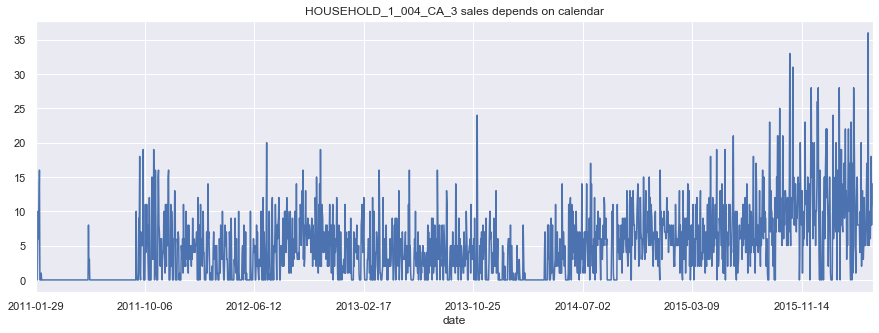

In [68]:
household = df_train.loc[df_train["id"] == "HOUSEHOLD_1_004_CA_3_validation"][d_cols].T
household = household.rename(columns={6666: "HOUSEHOLD_1_004_CA_3"})
household = household.reset_index().rename(columns={"index": "d"})
household = household.merge(df_calendar,how="left", validate="1:1")
household.set_index("date")["HOUSEHOLD_1_004_CA_3"].plot(figsize=(15, 5),
                                                   color="b",
                                                    title="HOUSEHOLD_1_004_CA_3 sales depends on calendar")


**Visualisation of the daily, weekly and monthly trends of the sales of these three random products**

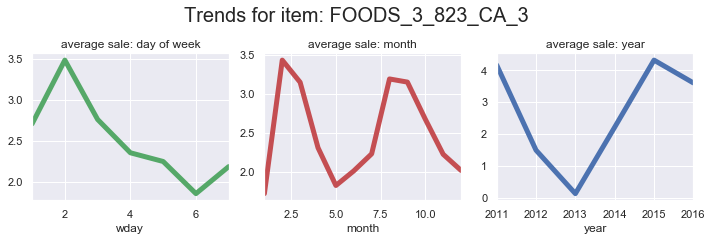

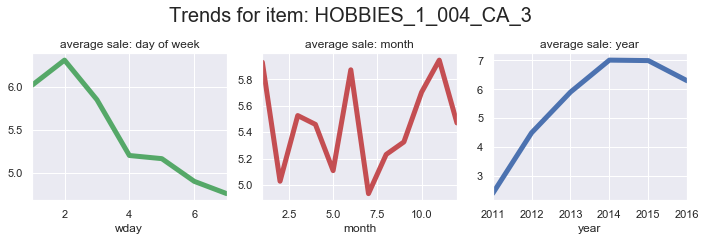

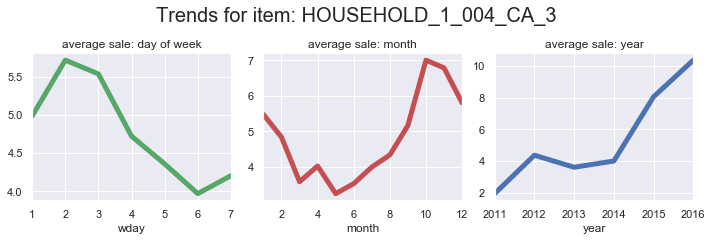

In [69]:
group = ['FOODS_3_823_CA_3','HOBBIES_1_004_CA_3','HOUSEHOLD_1_004_CA_3']
all_df = [food, hobbies, household]
for i in [0, 1, 2]:
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 3))
    all_df[i].groupby('wday').mean()[group[i]].plot(kind='line',
              title='average sale: day of week',
              lw=5,
              color="g",
              ax=ax1)
    all_df[i].groupby('month').mean()[group[i]].plot(kind='line',
              title='average sale: month',
              lw=5,
              color="r",
              ax=ax2)
    all_df[i].groupby('year').mean()[group[i]].plot(kind='line',
              lw=5,
              title='average sale: year',
              color="b",
              ax=ax3)
    fig.suptitle(f'Trends for item: {group[i]}',
                 size=20,
                 y=1.1)
    plt.tight_layout()
    plt.show()

**By checking three random items of each category (food,hobby,household)in a specific store,we can assume that there are some time trends in sales depends the day,week,month, but also depends the category of the item.**

## Sales by Category 


**-Q1 Is there diffence in sales of different categories?** 

In [70]:
cat=df_train["cat_id"].unique()
cat

array(['HOBBIES', 'HOUSEHOLD', 'FOODS'], dtype=object)

**Group the items per cat_id: HOBBIES, HOUSEHOLD, FOODS**

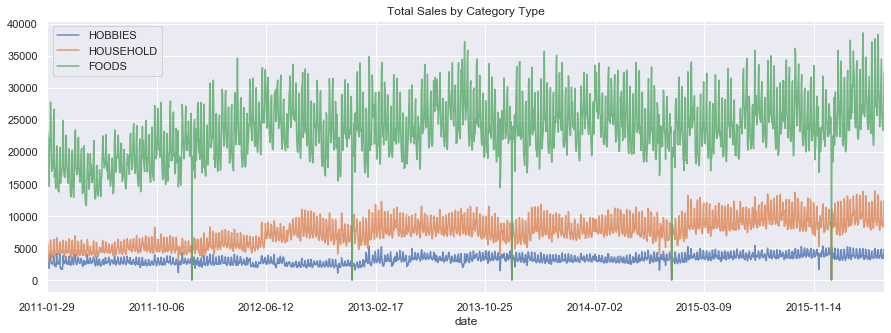

In [71]:
cat_sales = df_train.set_index('id')[d_cols] \
    .T \
    .merge(df_calendar.set_index('d')['date'],
           left_index=True,
           right_index=True,
            validate='1:1') \
    .set_index('date')
for i in df_train["cat_id"].unique():
    items_col = [c for c in cat_sales.columns if i in c]
    cat_sales[items_col] \
        .sum(axis=1) \
        .plot(figsize=(15, 5),
              alpha=0.8,
              title='Total Sales by Category Type')
plt.legend(df_train['cat_id'].unique())
plt.show()

**Some assumptions from the plot: 1)Food Category is being sold the most.2)The best sales happen during Summer.3)Household category items are gradually icreasing through out the years. We can assume the same for hobbies. 4)The zero points or the sudden increased points make us consider  about special events and days. Also, the zero sales,can also be unavailability of the product.**

**-Q2 Is there seasonality in the sales?**

**last year sales 2015 in every category**

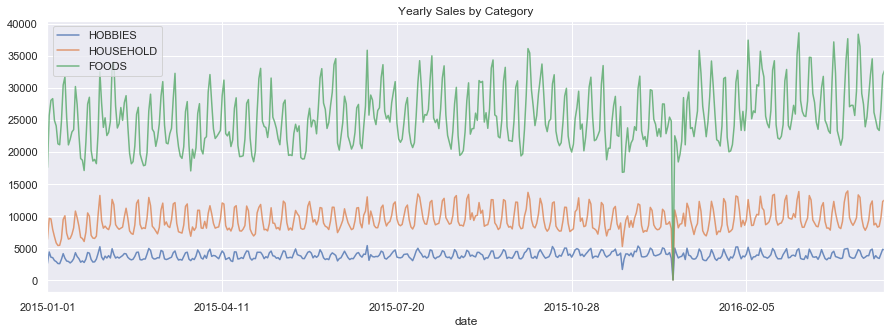

In [73]:
cat_15=cat_sales.loc[cat_sales.index.get_level_values("date") >= "2015-01-01"]
for i in df_train["cat_id"].unique():
    items_col = [c for c in cat_15.columns if i in c]
    cat_15[items_col] \
        .sum(axis=1) \
        .plot(figsize=(15, 5),
              alpha=0.8,
              title='Yearly Sales by Category')
plt.legend(df_train['cat_id'].unique())
plt.show()

**As before we can see summer months have better sales.Also, the periodical trend seems weekly. Moreover, there is an extreme change in December**

**December 2015 sales** 

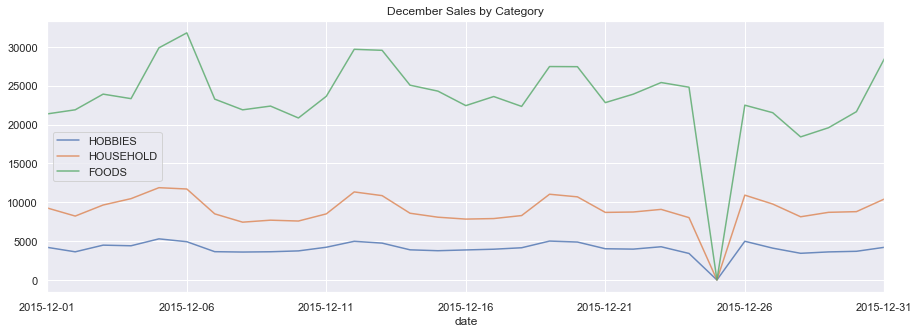

In [75]:
cat_dec=cat_sales.loc[(cat_sales.index.get_level_values("date") >= "2015-12-01") & (cat_sales.index.get_level_values("date") <= "2015-12-31")]
for i in df_train["cat_id"].unique():
    items_col = [c for c in cat_dec.columns if i in c]
    cat_dec[items_col] \
        .sum(axis=1) \
        .plot(figsize=(15, 5),
              alpha=0.8,
              title='December Sales by Category')
plt.legend(df_train['cat_id'].unique())
plt.show()

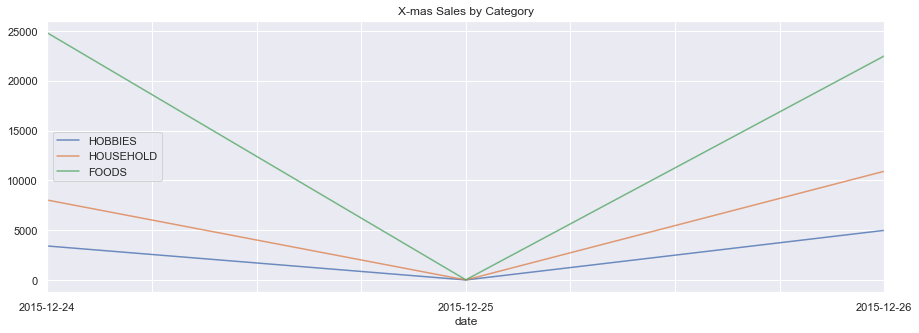

In [76]:
cat_x=cat_sales.loc[(cat_sales.index.get_level_values("date") >= "2015-12-24") & (cat_sales.index.get_level_values("date") <= "2015-12-26")]
for i in df_train["cat_id"].unique():
    items_col = [c for c in cat_x.columns if i in c]
    cat_x[items_col] \
        .sum(axis=1) \
        .plot(figsize=(15, 5),
              alpha=0.8,
              title='X-mas Sales by Category')
plt.legend(df_train['cat_id'].unique())
plt.show()

**Our outcome is that the periodical trend is weekly and the zero sales are on x-mas day, most propably because the stores are closed**

**-Q3 Are the extreme values in sales, on holidays and event days?**

**There is only one item which was sold during xmas day( the following). This can also be noisy value.**


In [78]:
xd=df_col1.loc[df_col1["date"]=="2015-12-25"]
xd[["date","weekday","event_type_1", "event_name_1", "id"]]

,date,weekday,event_type_1,event_name_1,id
1791,2015-12-25,Friday,National,Christmas,FOODS_1_183_CA_1_validation


## Different States

In [79]:
df_train["total_sales"] = df_train.sum(axis=1)
food_states = df_train.loc[(df_train["cat_id"] == "FOODS")].groupby(["state_id"]).mean().T
food_states= food_states.rename({"CA": "FOODS_CA", "TX": "FOODS_TX", "WI": "FOODS_WI"}, axis=1)
hobby_states=df_train.loc[(df_train["cat_id"] == "HOBBIES")].groupby(["state_id"]).mean().T
hobby_states=hobby_states.rename({"CA":"HOBBIES_CA", "TX":"HOBBIES_TX", "WI":"HOBBIES_WI"},axis=1)
household_states= df_train.loc[(df_train["cat_id"] == "HOUSEHOLD")].groupby(["state_id"]).mean().T
household_states= household_states.rename({"CA": "HOUSEHOLD_CA", "TX": "HOUSEHOLD_TX", "WI": "HOUSEHOLD_WI"}, axis=1)
cat_states = pd.concat([hobby_states, household_states, food_states], axis=1)
cat_states = cat_states.drop("total_sales")

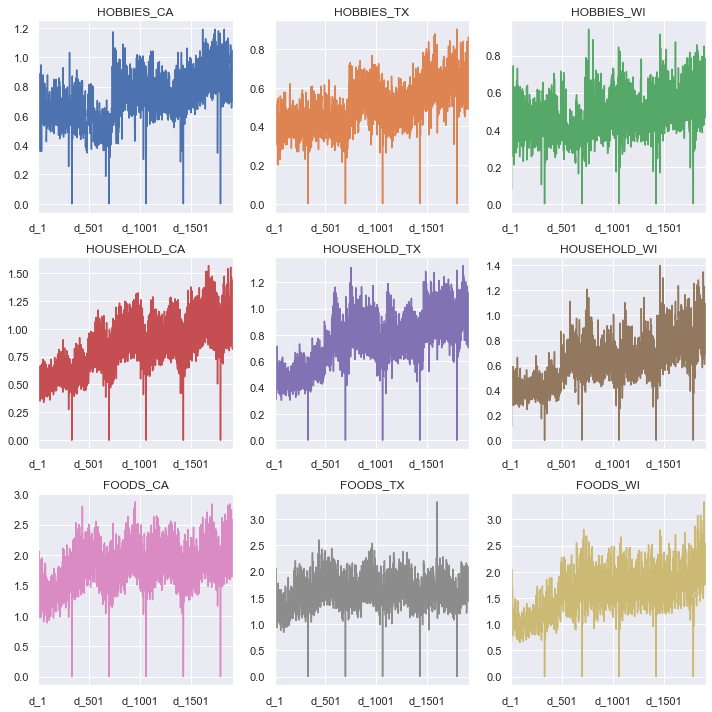

In [80]:
fig, axs = plt.subplots(3,3, figsize=(10,10))
axs = axs.flatten()
ax_idx = 0
for item in cat_states.columns:
    cat_states[item].plot(title=item, color=next(color_cycle), ax=axs[ax_idx])
    ax_idx += 1
plt.tight_layout()
plt.show()

**we observe same patterns in the sales(same days zero sales) in every state**


**Then we check in a random category in California, if these zero sales are the same day**

In [81]:
cat_states.loc[cat_states["HOBBIES_CA"] == 0]

state_id,HOBBIES_CA,HOBBIES_TX,HOBBIES_WI,HOUSEHOLD_CA,HOUSEHOLD_TX,HOUSEHOLD_WI,FOODS_CA,FOODS_TX,FOODS_WI
d_331,0.0,0.0,0.0,0.0,0.0,0.000000,0.001392,0.000464,0.000696
d_697,0.0,0.0,0.0,0.0,0.0,0.000000,0.001044,0.000464,0.000696
d_1062,0.0,0.0,0.0,0.0,0.0,0.000000,0.000870,0.003016,0.000464
d_1427,0.0,0.0,0.0,0.0,0.0,0.000000,0.001044,0.003016,0.000232
d_1792,0.0,0.0,0.0,0.0,0.0,0.000318,0.001044,0.000928,0.000696


In [82]:
df_calendar.loc[df_calendar["d"].isin(["d_331" , "d_697","d_1062", "d_1427", "d_1792"])][["d", "event_name_1"]]

,d,event_name_1
330,d_331,Christmas
696,d_697,Christmas
1061,d_1062,Christmas
1426,d_1427,Christmas
1791,d_1792,Christmas


**It is a fact that it is Xmas day**

**Now we want to check some other special days**

In [83]:
df_col1.loc[df_col1["event_type_1"].isin(["National", "Sporting", "Cultural", "Religious"])][["d","date", "weekday", "event_name_1"]]



,d,date,weekday,event_name_1
8,d_9,2011-02-06,Sunday,SuperBowl
16,d_17,2011-02-14,Monday,ValentinesDay
23,d_24,2011-02-21,Monday,PresidentsDay
39,d_40,2011-03-09,Wednesday,LentStart
46,d_47,2011-03-16,Wednesday,LentWeek2
...,...,...,...,...
1926,d_1927,2016-05-08,Sunday,Mother's day
1948,d_1949,2016-05-30,Monday,MemorialDay
1951,d_1952,2016-06-02,Thursday,NBAFinalsStart
1956,d_1957,2016-06-07,Tuesday,Ramadan starts


**We will plot some specific days to make some assumptions**

*February 2011*

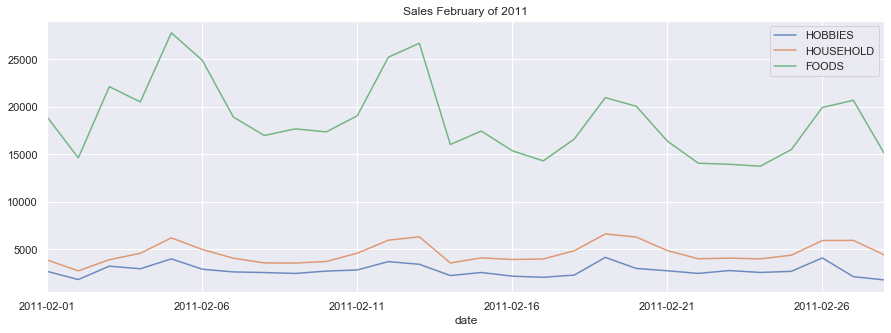

In [84]:
cat_dec=cat_sales.loc[(cat_sales.index.get_level_values("date") >= "2011-02-01") & (cat_sales.index.get_level_values("date") <= "2011-02-31")]
for i in df_train["cat_id"].unique():
    items_col = [c for c in cat_dec.columns if i in c]
    cat_dec[items_col] \
        .sum(axis=1) \
        .plot(figsize=(15, 5),
              alpha=0.8,
              title='Sales February of 2011')
plt.legend(df_train['cat_id'].unique())
plt.show()

*February 2016*

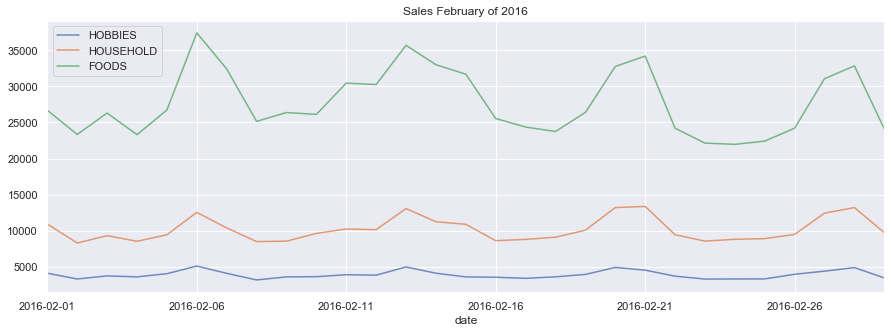

In [85]:
cat_dec=cat_sales.loc[(cat_sales.index.get_level_values("date") >= "2016-02-01") & (cat_sales.index.get_level_values("date") <= "2016-02-31")]
for i in df_train["cat_id"].unique():
    items_col = [c for c in cat_dec.columns if i in c]
    cat_dec[items_col] \
        .sum(axis=1) \
        .plot(figsize=(15, 5),
              alpha=0.8,
              title='Sales February of 2016')
plt.legend(df_train['cat_id'].unique())
plt.show()

**By checking the same month in two different years we can see that exact before the superbowl, the presidents day and valentines day there is rise of sales. Also wee can see that the best sales are in the last days of a week like Friday and Saturday**

**We will make one last plot before the answer of Q3**

*25/5/2011-25/6/2011*

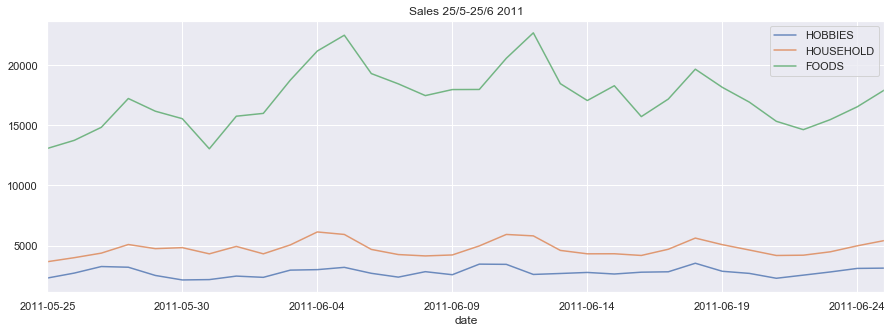

In [87]:
cat_dec=cat_sales.loc[(cat_sales.index.get_level_values("date") >= "2011-05-25") & (cat_sales.index.get_level_values("date") <= "2011-06-25")]
for i in df_train["cat_id"].unique():
    items_col = [c for c in cat_dec.columns if i in c]
    cat_dec[items_col] \
        .sum(axis=1) \
        .plot(figsize=(15, 5),
              alpha=0.8,
              title='Sales 25/5-25/6 2011')
plt.legend(df_train['cat_id'].unique())
plt.show()

**Observations: rise the days before the memorial day. Also, rise one day before the NBAFinalStart,fall the NBA day starts,rise again during the finals week, fall the days before the NBAFinalEnd and rise the day of the NBAFinalEnd.**

**We can also see clearly weekdays trend-> peak on Friday and Saturday,then decrease till Thursady and rise the day after**

**-Q4 Do sales differ by State?** 

**-Q5 Do sales differ by Store?**

## Sales in each Store 

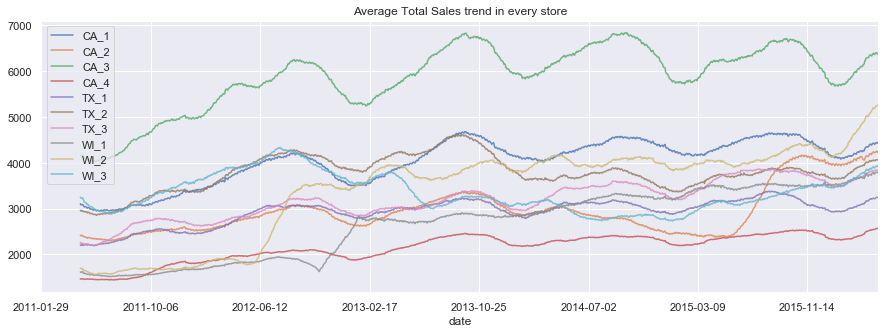

In [90]:
sales_stores = df_col1['store_id'].unique()
for s in sales_stores:
    store_items = [c for c in cat_sales.columns if s in c]
    cat_sales[store_items] \
        .sum(axis=1) \
        .rolling(90).mean() \
        .plot(figsize=(15, 5),
              alpha=0.8,
              title='Average Total Sales trend in every store')
plt.legend(sales_stores)
plt.show()

## Sales in each State

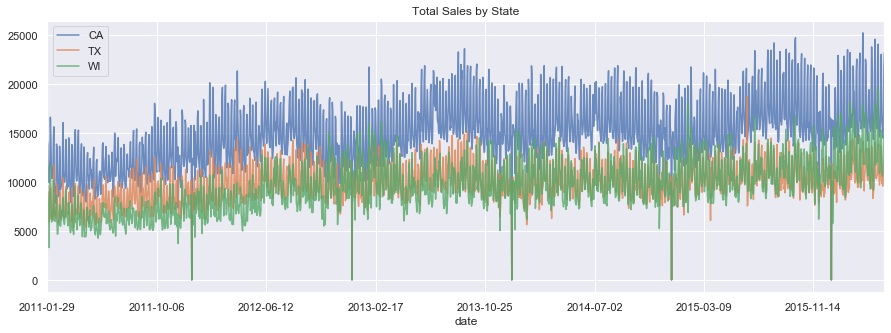

In [91]:
for i in df_train["state_id"].unique():
    items_col = [c for c in cat_sales.columns if i in c]
    cat_sales[items_col] \
        .sum(axis=1) \
        .plot(figsize=(15, 5),
              alpha=0.8,
              title='Total Sales by State')
plt.legend(df_train['state_id'].unique())
plt.show()

In [92]:
df_train.state_id.value_counts()

CA    12196
WI     9147
TX     9147
Name: state_id, dtype: int64

**Asumptions: 1)Best sales ca_3, worst sales ca_4. Some stores seem to be very steady.
2)CA_2 from beggin till end of 2015 has BIG DIFFERENCES. 3)California has better sales than the rest(also it has more stores) 4)WN and TX have better performances as the years passing.
5)All sales in all state have better performance during the years.**

## PRICES

**the item with the max price**

In [95]:
max_prices=max(df_prices["sell_price"])
most_expensive=df_prices[df_prices["sell_price"]==max_prices]
most_expensive

,store_id,item_id,wm_yr_wk,sell_price
6485945,WI_3,HOUSEHOLD_2_406,11317,107.32
6485946,WI_3,HOUSEHOLD_2_406,11318,107.32
6485947,WI_3,HOUSEHOLD_2_406,11319,107.32


**Plot : HOUSEHOLD_2_406 prices**

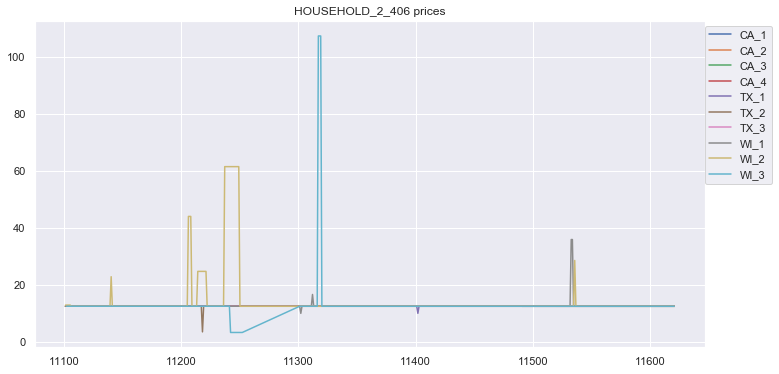

In [96]:
hs2_406=df_prices.loc[df_prices["item_id"].str.contains("HOUSEHOLD_2_406")]
plt.figure(figsize=(12,6))
for d in hs2_406["store_id"].unique():
    small_df=hs2_406.loc[hs2_406["store_id"]== d]
    grouped=small_df.groupby(["wm_yr_wk"])["sell_price"].mean()
    plt.plot(grouped.index, grouped.values, label=d)
    plt.legend(loc=(1.0, 0.5))
    plt.title("HOUSEHOLD_2_406 prices");

**Plot: HOUSEHOLD_2_406 sales**

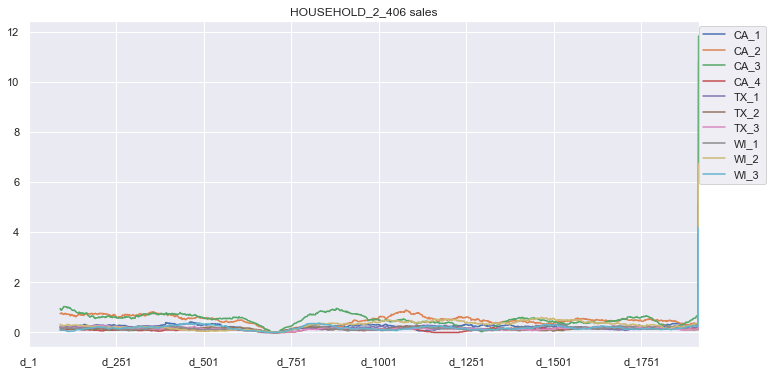

In [97]:
hs2=df_train.loc[df_train["item_id"]=="HOUSEHOLD_2_406"]
plt.figure(figsize=(12,6))
for d in hs2["store_id"].unique():
    smal_df=hs2.loc[hs2["store_id"]== d]
    smal_df.iloc[:, 6:].sum().rolling(90).mean().plot(label=d)
    plt.legend(loc=(1.0, 0.5))
    plt.title("HOUSEHOLD_2_406 sales");

**the items with the min prices**

In [98]:
min_prices=min(df_prices["sell_price"])
less_expensive=df_prices[df_prices["sell_price"]==min_prices]
less_expensive

,store_id,item_id,wm_yr_wk,sell_price
225727,CA_1,HOUSEHOLD_1_443,11442,0.01
1394085,CA_3,HOBBIES_1_261,11332,0.01
1394086,CA_3,HOBBIES_1_261,11333,0.01
1394087,CA_3,HOBBIES_1_261,11334,0.01
2617306,CA_4,FOODS_3_413,11148,0.01
4877375,WI_1,HOBBIES_1_338,11342,0.01
4877376,WI_1,HOBBIES_1_338,11343,0.01
5044267,WI_1,HOUSEHOLD_1_533,11408,0.01
5316537,WI_1,FOODS_3_122,11425,0.01
6282347,WI_3,HOUSEHOLD_1_036,11442,0.01


**-Q6 Is there any connection between the sales and the prices?**

**Plot : Prices and Sales of Hobbies in every state**

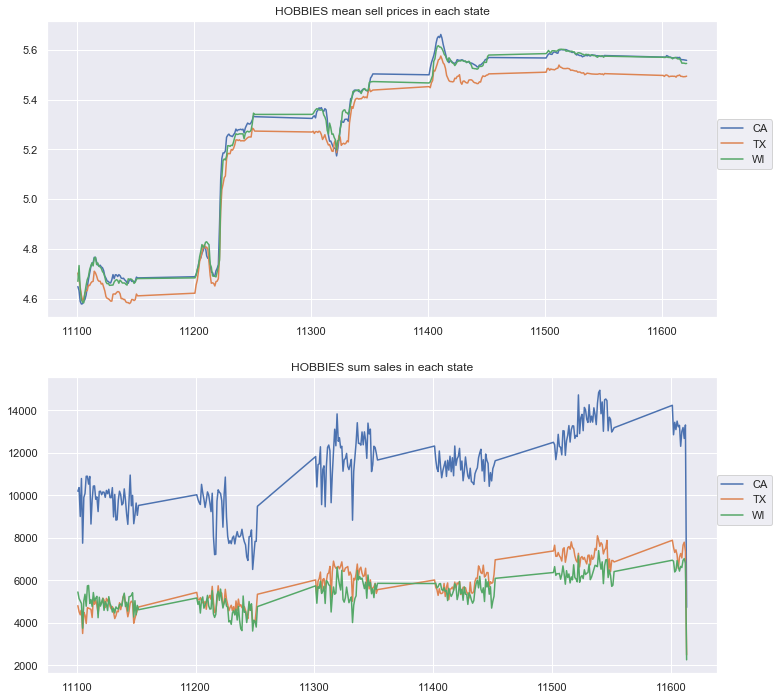

In [99]:
plt.figure(figsize=(12, 12))
plt.subplot(2,1,1)

hob_pr=df_prices.loc[df_prices['item_id'].str.contains('HOBBIES')]
hob_pr_CA = hob_pr.loc[hob_pr['store_id'].str.contains('CA')]
hob_pr_TX = hob_pr.loc[hob_pr['store_id'].str.contains('TX')]
hob_pr_WI = hob_pr.loc[hob_pr['store_id'].str.contains('WI')]

grouped_CA = hob_pr_CA.groupby(['wm_yr_wk'])['sell_price'].mean()
plt.plot(grouped_CA.index, grouped_CA.values, label="CA")
grouped_TX = hob_pr_TX.groupby(['wm_yr_wk'])['sell_price'].mean()
plt.plot(grouped_TX.index, grouped_TX.values, label="TX")
grouped_WI = hob_pr_WI.groupby(['wm_yr_wk'])['sell_price'].mean()
plt.plot(grouped_WI.index, grouped_WI.values, label="WI")
plt.legend(loc=(1.0, 0.5))
plt.title('HOBBIES mean sell prices in each state');

plt.subplot(2,1,2)

cal = df_calendar[['wm_yr_wk', 'd']]
cal = cal.rename(columns={"d": "index"})
hobbies_ct = df_train.loc[df_train['item_id'].str.contains('HOBBIES')]
hobbies_ct_CA = hobbies_ct.loc[hobbies_ct['store_id'].str.contains('CA')].drop(columns = ['id','item_id','dept_id','cat_id','store_id','state_id']).sum().reset_index().drop(1913)
hobbies_ct_TX = hobbies_ct.loc[hobbies_ct['store_id'].str.contains('TX')].drop(columns = ['id','item_id','dept_id','cat_id','store_id','state_id']).sum().reset_index().drop(1913)
hobbies_ct_WI = hobbies_ct.loc[hobbies_ct['store_id'].str.contains('WI')].drop(columns = ['id','item_id','dept_id','cat_id','store_id','state_id']).sum().reset_index().drop(1913)

hobbies_ct_CA = pd.merge(hobbies_ct_CA, cal, on='index')
hobbies_ct_TX = pd.merge(hobbies_ct_TX, cal, on='index')
hobbies_ct_WI = pd.merge(hobbies_ct_WI, cal, on='index')

grouped_CA = hobbies_ct_CA.drop(columns = "index").groupby(['wm_yr_wk']).sum()
plt.plot(grouped_CA.index, grouped_CA.values, label="CA")
grouped_TX = hobbies_ct_TX.drop(columns = "index").groupby(['wm_yr_wk']).sum()
plt.plot(grouped_TX.index, grouped_TX.values, label="TX")
grouped_WI = hobbies_ct_WI.drop(columns = "index").groupby(['wm_yr_wk']).sum()
plt.plot(grouped_WI.index, grouped_WI.values, label="WI")
plt.legend(loc=(1.0, 0.5))
plt.title('HOBBIES sum sales in each state');

**Plot: Prices and Sales of Food in every State**

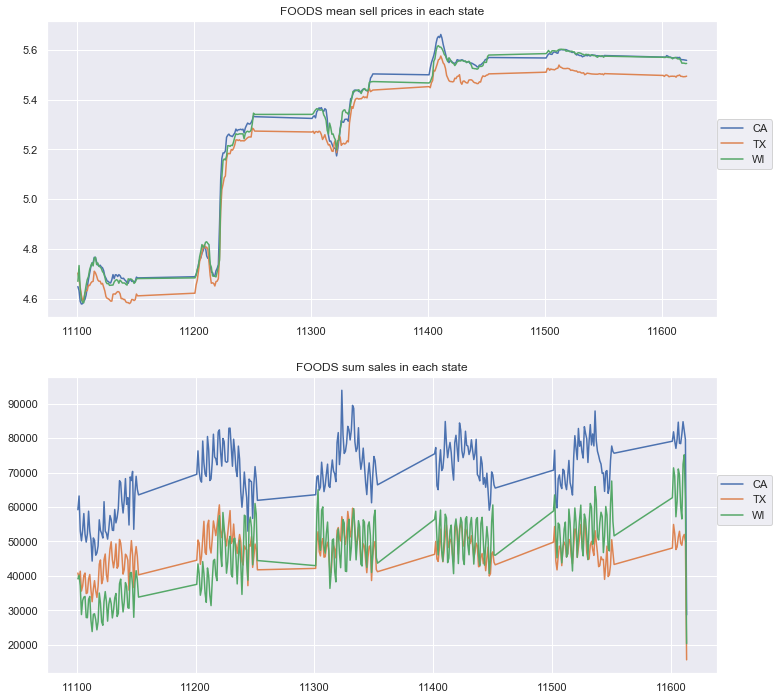

In [101]:
plt.figure(figsize=(12, 12))
plt.subplot(2,1,1)

food_pr=df_prices.loc[df_prices['item_id'].str.contains('FOODS')]
food_pr_CA = hob_pr.loc[hob_pr['store_id'].str.contains('CA')]
food_pr_TX = hob_pr.loc[hob_pr['store_id'].str.contains('TX')]
food_pr_WI = hob_pr.loc[hob_pr['store_id'].str.contains('WI')]

grouped_CA = food_pr_CA.groupby(['wm_yr_wk'])['sell_price'].mean()
plt.plot(grouped_CA.index, grouped_CA.values, label="CA")
grouped_TX = food_pr_TX.groupby(['wm_yr_wk'])['sell_price'].mean()
plt.plot(grouped_TX.index, grouped_TX.values, label="TX")
grouped_WI = food_pr_WI.groupby(['wm_yr_wk'])['sell_price'].mean()
plt.plot(grouped_WI.index, grouped_WI.values, label="WI")
plt.legend(loc=(1.0, 0.5))
plt.title('FOODS mean sell prices in each state');

plt.subplot(2,1,2)

cal = df_calendar[['wm_yr_wk', 'd']]
cal = cal.rename(columns={"d": "index"})
food_ct = df_train.loc[df_train['item_id'].str.contains('FOODS')]
food_ct_CA = food_ct.loc[food_ct['store_id'].str.contains('CA')].drop(columns = ['id','item_id','dept_id','cat_id','store_id','state_id']).sum().reset_index().drop(1913)
food_ct_TX = food_ct.loc[food_ct['store_id'].str.contains('TX')].drop(columns = ['id','item_id','dept_id','cat_id','store_id','state_id']).sum().reset_index().drop(1913)
food_ct_WI = food_ct.loc[food_ct['store_id'].str.contains('WI')].drop(columns = ['id','item_id','dept_id','cat_id','store_id','state_id']).sum().reset_index().drop(1913)

food_ct_CA = pd.merge(food_ct_CA, cal, on='index')
food_ct_TX = pd.merge(food_ct_TX, cal, on='index')
food_ct_WI = pd.merge(food_ct_WI, cal, on='index')

grouped_CA = food_ct_CA.drop(columns = "index").groupby(['wm_yr_wk']).sum()
plt.plot(grouped_CA.index, grouped_CA.values, label="CA")
grouped_TX = food_ct_TX.drop(columns = "index").groupby(['wm_yr_wk']).sum()
plt.plot(grouped_TX.index, grouped_TX.values, label="TX")
grouped_WI = food_ct_WI.drop(columns = "index").groupby(['wm_yr_wk']).sum()
plt.plot(grouped_WI.index, grouped_WI.values, label="WI")
plt.legend(loc=(1.0, 0.5))
plt.title('FOODS sum sales in each state');

**When the price is rising, the sales are dropping,and then slowly are climbing back. Afterwards,the price starts rising very slightly and at the same time, sales are also rising sligtly.Generally the trend is that stores rise the prices, they keep them steady for some time in order to keep steady the sales, and then they rise them again. That is happening continiously,and in the end both prices and sales are higher. They dont loose customers from the rise of the prices**
